In [3]:
# --- Step 0: Install Required Libraries ---
!pip install scikit-image matplotlib numpy opencv-python-headless

# --- Step 1: Import Libraries ---
import numpy as np
import matplotlib.pyplot as plt
from skimage import data, img_as_float
import cv2


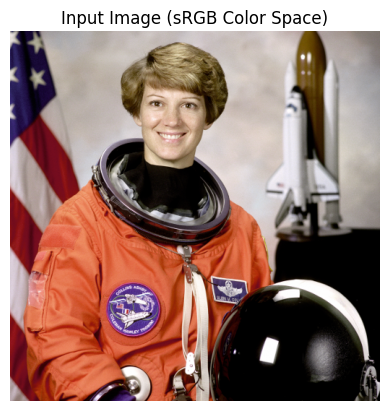

Image shape: (512, 512, 3)


In [6]:
image = data.astronaut()  # built-in sample from scikit-image
image = img_as_float(image)  # normalize RGB values to 0–1
plt.imshow(image)
plt.title("Input Image (sRGB Color Space)")
plt.axis("off")
plt.show()

print(f"Image shape: {image.shape}")



In [7]:
# Convert sRGB to Linear RGB (Gamma Correction) inverse gamma function
def srgb_to_linear(rgb):
    mask = rgb <= 0.04045
    linear = np.empty_like(rgb)
    linear[mask] = rgb[mask] / 12.92
    linear[~mask] = ((rgb[~mask] + 0.055) / 1.055) ** 2.4
    return linear

rgb_linear = srgb_to_linear(image)

# Convert Linear RGB → CIE XYZ
# Transformation matrix for sRGB (D65 white point)
M = np.array([
    [0.4124564, 0.3575761, 0.1804375],
    [0.2126729, 0.7151522, 0.0721750],
    [0.0193339, 0.1191920, 0.9503041]
])

rgb_flat = rgb_linear.reshape(-1, 3)
xyz_flat = np.dot(rgb_flat, M.T)
X, Y, Z = xyz_flat[:, 0], xyz_flat[:, 1], xyz_flat[:, 2]
print("Converted RGB → XYZ successfully.")


Converted RGB → XYZ successfully.


In [8]:
# Compute CIE 1931 Chromaticity Coordinates ---
denom = X + Y + Z
mask = denom > 1e-6
x = X[mask] / denom[mask]
y = Y[mask] / denom[mask]

print("Chromaticity computed:")
for i in range(3):
    print(f"Pixel {i+1}: x={x[i]:.4f}, y={y[i]:.4f}")


Chromaticity computed:
Pixel 1: x=0.3161, y=0.3229
Pixel 2: x=0.2943, y=0.2866
Pixel 3: x=0.2460, y=0.2081


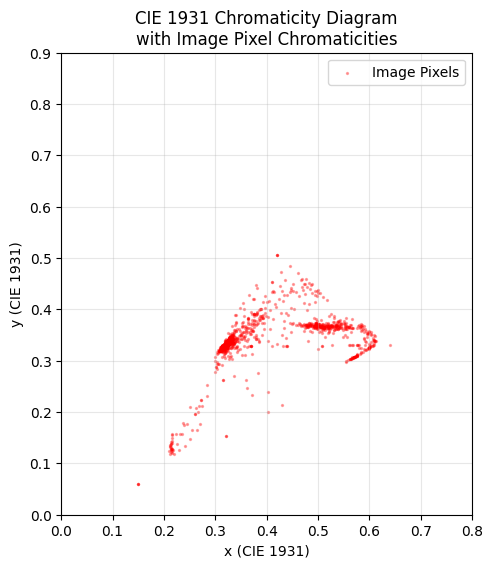

In [10]:
# Plot CIE Diagram and Image Pixel Chromaticities
plt.figure(figsize=(8, 6))
plt.imshow(cie_bg, extent=[0, 0.8, 0, 0.9])
plt.scatter(x[::200], y[::200], s=2, c='red', alpha=0.3, label='Image Pixels')
plt.xlabel("x (CIE 1931)")
plt.ylabel("y (CIE 1931)")
plt.title("CIE 1931 Chromaticity Diagram\nwith Image Pixel Chromaticities")
plt.xlim(0, 0.8)
plt.ylim(0, 0.9)
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()
